In [6]:
#Import Data and Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/Ellina/Desktop/DS552/HW/HW2/ps2_public.csv')

In [7]:
df.head(10)

,treatment,age,blood_pressure,gender,blood_test,family_history,TestA,TestB,GeneC,GeneD,GeneE,GeneF
0,0,64,103.820809,non-female,negative,False,4.334376,0.324374,not active,1,1,0
1,0,52,107.071369,female,negative,False,0.361847,-0.213014,active,1,0,0
2,1,55,113.116130,female,positive,False,3.611842,-0.071740,not active,0,0,1
3,0,45,83.760932,female,negative,NaN,-5.282537,-0.237121,active,0,0,0
4,0,58,131.135933,female,negative,False,2.787207,0.195470,not active,0,1,1
5,0,73,89.559418,female,negative,False,9.377399,0.026624,not active,1,1,1
6,0,58,102.094300,non-female,negative,False,3.283889,-0.203806,not active,1,0,1
7,1,61,98.796022,non-female,negative,NaN,5.237440,0.047754,active,0,0,1
8,1,55,101.069962,non-female,negative,False,-0.538130,0.110359,not active,1,0,1
9,1,51,95.959398,non-female,negative,False,-0.752222,0.011585,active,1,0,1


In [8]:
df.describe()

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.552533,59.978000,101.023910,3.983448,-0.000590,0.549467,0.550667,0.551200
std,0.497266,8.100115,36.128945,4.162343,0.171500,0.497580,0.497459,0.497405
min,0.000000,29.000000,-999.000000,-11.699344,-0.288422,0.000000,0.000000,0.000000
25%,0.000000,54.000000,91.802997,1.117443,-0.134452,0.000000,0.000000,0.000000
50%,1.000000,60.000000,99.814330,3.991237,-0.027296,1.000000,1.000000,1.000000
75%,1.000000,65.000000,110.095869,6.784449,0.101578,1.000000,1.000000,1.000000
max,1.000000,93.000000,157.471226,21.386412,0.740719,1.000000,1.000000,1.000000


In [9]:
#Understand the dataset, Look through the data shape and what featues in the dataset.
print(df.shape)
print(df.columns)

(7500, 12)
Index(['treatment', 'age', 'blood_pressure', 'gender', 'blood_test',
       'family_history', 'TestA', 'TestB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
      dtype='object')


# 1. Data Cleaning


## 1.1 Outlier

### 1.1.1 Age

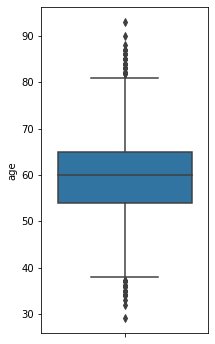

In [10]:
#Visualized the age via boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y='age', data=df);

In [11]:
y = sorted(df['age'])
quantile1, quantile3 = np.percentile(y, [10,90])
print(quantile1, quantile3)

50.0 70.0


In [12]:
df = df[(df.age <= 70) & (df.age >= 50)]
df.shape

(6037, 12)

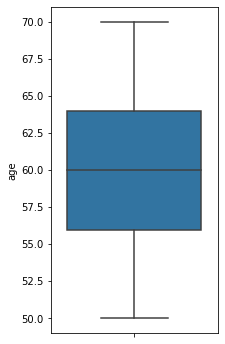

In [13]:
#Visualized the age via boxplot again
plt.figure(figsize=(3,6))
sns.boxplot(y='age', data=df);

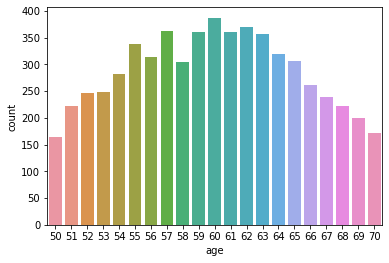

In [14]:
sns.countplot(x='age', data=df)

### 1.1.2 Blood_Pressure

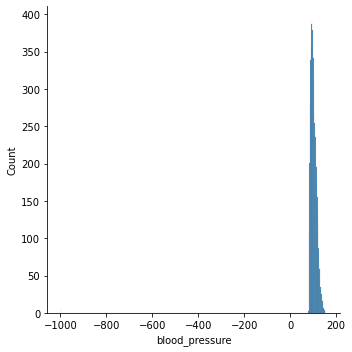

In [15]:
sns.displot(x='blood_pressure', data=df)

- It is not possible for blood_pressure with negative value
- Drop value of blood_pressure less than 0

In [16]:
df = df[df.blood_pressure >= 0 ]
df.shape

(6031, 12)

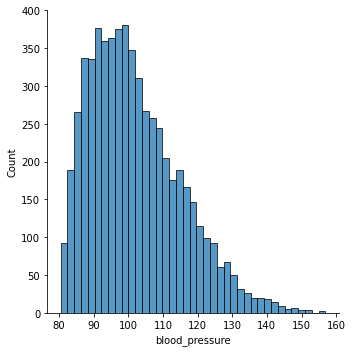

In [17]:
sns.displot(x='blood_pressure', data=df)

## 1.2 Missing Values 

In [18]:
#To see the number of Missing value
Missing_values = df.isnull().sum()
print(Missing_values)

treatment            0
age                  0
blood_pressure       0
gender               0
blood_test           0
family_history    2095
TestA                0
TestB                0
GeneC                0
GeneD                0
GeneE                0
GeneF                0
dtype: int64


#### - fill missing values according to frequency

- Check with value_counts + np.random.choice

- Reference: https://stackoverflow.com/questions/63548053/python-fill-missing-values-according-to-frequency

In [19]:
#A generic answer: more than 2 valid values in the column is to find the distribution and fill based on that. 
dist = df.family_history.value_counts(normalize=True)
print(dist)


False    0.985772
True     0.014228
Name: family_history, dtype: float64


In [20]:
#get the rows with missing values
nan_rows = df['family_history'].isnull()

In [21]:
#fill the those rows with randomly selected values based on the above distribution
df.loc[nan_rows,'family_history'] = np.random.choice(dist.index, size=len(df[nan_rows]),p=dist.values)


In [22]:
#Check again for number of Missing value 
Missing_values = df.isnull().sum()
print(Missing_values)

treatment         0
age               0
blood_pressure    0
gender            0
blood_test        0
family_history    0
TestA             0
TestB             0
GeneC             0
GeneD             0
GeneE             0
GeneF             0
dtype: int64


# 2. Exploratory Data Analysis

- To investigate the distribution of all features with respect to target feature(treatment) for a general understanding. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1206f6910>,
      dtype=object)

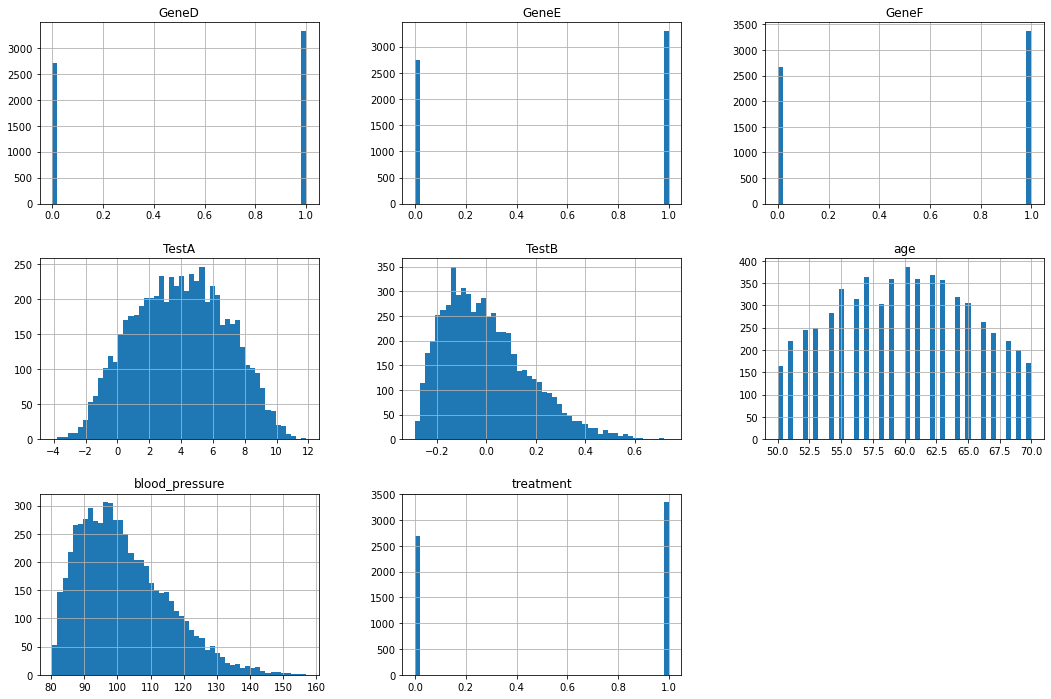

In [23]:
#To investigate the histogram of each attribute. 
df.hist(bins=50,figsize=(18,12))

### 2.1 Correlation between numerical attributes


In [24]:
numeric_attribute = ['treatment', 'age', 'blood_pressure', 'TestA', 'TestB', 'GeneD', 'GeneE', 'GeneF']


In [25]:
#Plot correlation matrix
corr_numeric = df[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF
treatment,1.000000,-0.140788,0.109113,-0.131988,-0.087565,-0.006741,-0.046960,-0.016503
age,-0.140788,1.000000,-0.007385,0.937268,-0.016912,0.008545,0.027627,-0.012634
blood_pressure,0.109113,-0.007385,1.000000,-0.007389,0.009860,0.010710,-0.002443,-0.008529
TestA,-0.131988,0.937268,-0.007389,1.000000,-0.013121,0.012030,0.028920,-0.015040
TestB,-0.087565,-0.016912,0.009860,-0.013121,1.000000,-0.000496,-0.008852,-0.007488
GeneD,-0.006741,0.008545,0.010710,0.012030,-0.000496,1.000000,0.003983,0.009215
GeneE,-0.046960,0.027627,-0.002443,0.028920,-0.008852,0.003983,1.000000,-0.006165
GeneF,-0.016503,-0.012634,-0.008529,-0.015040,-0.007488,0.009215,-0.006165,1.000000


- Notice that numerical attributes Test A & age have strong/higher realtionship (corr = 0.937)

### 2.2 Age, Gender, Treatment

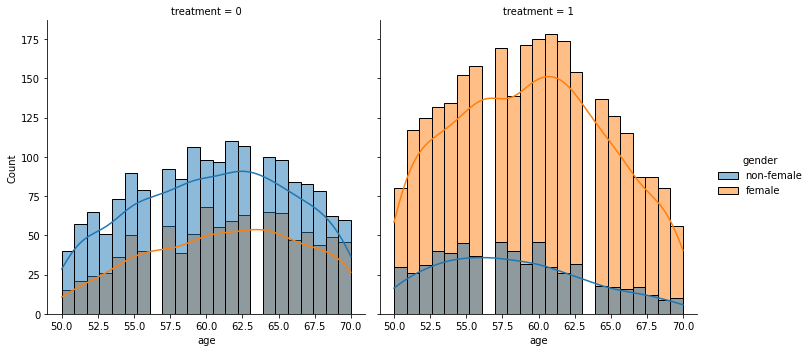

In [26]:
# Age+Gender & Treatment
sns.displot(x='age', hue='gender', col='treatment',data=df, kde=True)

- Notice that the treatment efficiently on the age of 57 and 60
- There is clear turning point of treatment from 1 to 0 between the age of 63 and 64.

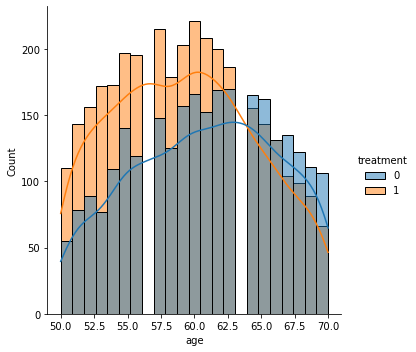

In [27]:
# Age & Treatment (displot)
sns.displot(x='age', hue='treatment',data=df, kde=True)


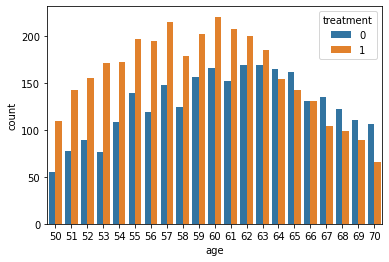

In [28]:
# Age & Treatment (countplot)
sns.countplot(x='age', hue='treatment',data=df)


### 2.3 Gender & Treatment

In [29]:
#To see the relationship between gender (M/F) and treatment (0/1)
df_treatment_1 = df[df['treatment'] ==1]
print('Treatment = 1: ==========')
print(df_treatment_1['gender'].value_counts())
df_treatment_0 = df[df['treatment'] ==0]
print('Treatment = 0: ==========')
print(df_treatment_0['gender'].value_counts())

Treatment = 1: ==========
female        2746
non-female     599
Name: gender, dtype: int64
Treatment = 0: ==========
non-female    1716
female         970
Name: gender, dtype: int64


- Notice that Male is around 40% of dataset while Female is 60% of dataset

(6031, 12)
female        3716
non-female    2315
Name: gender, dtype: int64


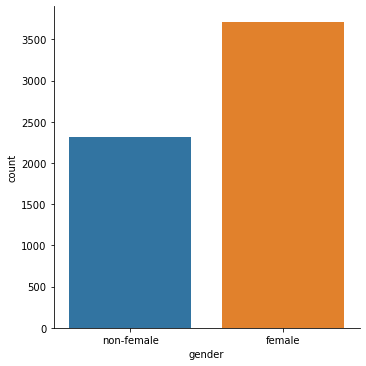

In [30]:
#Overall gender statistics
print(df.shape)
print(df['gender'].value_counts())
sns.catplot(x="gender", data =df,kind="count")

- There is a significant treatment on female rather than male. 

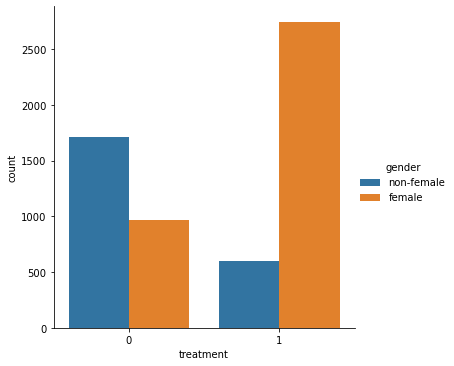

In [31]:
#Statistics of gender based on treatment classification
sns.catplot(x='treatment', hue='gender', data=df,kind='count')

### 2.4 Gene C & Treatment

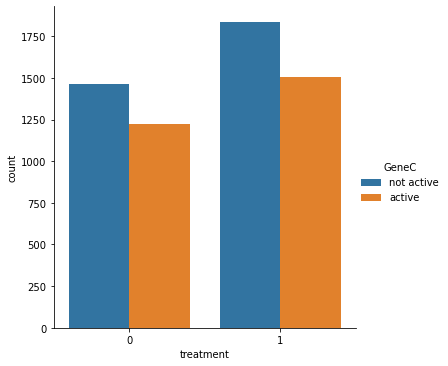

In [32]:
#Statistics of Gene C based on treatment classification
sns.catplot(x='treatment', hue='GeneC', data=df,kind='count')

# 3. Data Preprocessing

- In order to prepare data for predictive modeling, we need to change caterogircal variables into numbers. 


In [33]:
df.shape

(6031, 12)

In [34]:
#Look through each categorical value and counts
print(df.gender.value_counts())
print(df.blood_test.value_counts())
print(df.family_history.value_counts())
print(df.GeneC.value_counts())


female        3716
non-female    2315
Name: gender, dtype: int64
negative    5522
positive     509
Name: blood_test, dtype: int64
False    5948
True       83
Name: family_history, dtype: int64
not active    3299
active        2732
Name: GeneC, dtype: int64


## 3.1 One-Hot Vectorization

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

gender_encode, blood_test_encode, family_history_encode, GeneC_encode = OneHotEncoder(sparse=False), OneHotEncoder(sparse=False), OneHotEncoder(sparse=False), OneHotEncoder(sparse=False)

gender_hot = gender_encode.fit_transform(df[['gender']])
blood_test_hot = blood_test_encode.fit_transform(df[['blood_test']])
family_history_hot = family_history_encode.fit_transform(df[['family_history']])
GeneC_hot = GeneC_encode.fit_transform(df[['GeneC']])


#Reference: Brownlee, J. (2019, August 14). How to one hot encode sequence data in python. Retrieved February 08, 2021, from https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/



In [36]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def change_to_OneHotEncoder(name):
    
    data = df[name]
    values = array(data)
    print(values[0:15])

    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded[0:15])

    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    #print(onehot_encoded[0:5])
    onehot_encoded_df = pd.DataFrame(onehot_encoded)
    return onehot_encoded_df

gender_df = change_to_OneHotEncoder('gender')
gender_df.columns = ['female', 'male']
#gender_df.head(10)

blood_test_df = change_to_OneHotEncoder('blood_test')
blood_test_df.columns = ['bt_negative', 'bt_positive']

family_history_df = change_to_OneHotEncoder('family_history')
family_history_df.columns = ['fh_False', 'fh_True']

GeneC_df = change_to_OneHotEncoder('GeneC')
GeneC_df.columns = ['C_not active', 'C_active']

#GeneC

['non-female' 'female' 'female' 'female' 'non-female' 'non-female'
 'non-female' 'non-female' 'non-female' 'non-female' 'female' 'female'
 'female' 'female' 'female']
[1 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[False False False False False False False False False False False False
 False False False]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['not active' 'active' 'not active' 'not active' 'not active' 'active'
 'not active' 'active' 'not active' 'not active' 'active' 'active'
 'not active' 'not active' 'not active']
[1 0 1 1 1 0 1 0 1 1 0 0 1 1 1]


## 3.2 Create new dataframe 'df_new'

In [37]:
#Continuous Data
numeric_attribute = ['treatment', 'age', 'blood_pressure', 'TestA', 'TestB', 'GeneD', 'GeneE', 'GeneF']
numeric_df = df[numeric_attribute]

numeric_df.shape

numeric_df = numeric_df.reset_index(drop=True)
numeric_df


,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF
0,0,64,103.820809,4.334376,0.324374,1,1,0
1,0,52,107.071369,0.361847,-0.213014,1,0,0
2,1,55,113.116130,3.611842,-0.071740,0,0,1
3,0,58,131.135933,2.787207,0.195470,0,1,1
4,0,58,102.094300,3.283889,-0.203806,1,0,1
...,...,...,...,...,...,...,...,...
6026,0,55,99.173749,1.470279,-0.017893,0,1,1
6027,1,60,102.274615,4.017737,0.348200,0,0,1
6028,0,60,86.844244,3.001425,0.274537,1,0,0
6029,1,56,99.640132,2.442280,-0.062665,0,1,1


In [38]:
df_new = pd.concat([numeric_df, gender_df, blood_test_df, family_history_df, GeneC_df], axis=1)

df_new


,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF,female,male,bt_negative,bt_positive,fh_False,fh_True,C_not active,C_active
0,0,64,103.820809,4.334376,0.324374,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,52,107.071369,0.361847,-0.213014,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,55,113.116130,3.611842,-0.071740,0,0,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0,58,131.135933,2.787207,0.195470,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,58,102.094300,3.283889,-0.203806,1,0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,0,55,99.173749,1.470279,-0.017893,0,1,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6027,1,60,102.274615,4.017737,0.348200,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6028,0,60,86.844244,3.001425,0.274537,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6029,1,56,99.640132,2.442280,-0.062665,0,1,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [39]:
#Double check if there is NULL value in new dataframe
NULL = df_new.isnull().sum()
print(NULL)

treatment         0
age               0
blood_pressure    0
TestA             0
TestB             0
GeneD             0
GeneE             0
GeneF             0
female            0
male              0
bt_negative       0
bt_positive       0
fh_False          0
fh_True           0
C_not active      0
C_active          0
dtype: int64


# 4. Understanding of features

In [40]:
#Plot correlation matrix
corr = df_new.corr()
corr.style.background_gradient(cmap='YlGnBu')

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF,female,male,bt_negative,bt_positive,fh_False,fh_True,C_not active,C_active
treatment,1.000000,-0.140788,0.109113,-0.131988,-0.087565,-0.006741,-0.046960,-0.016503,0.469896,-0.469896,0.029174,-0.029174,-0.048582,0.048582,-0.004866,0.004866
age,-0.140788,1.000000,-0.007385,0.937268,-0.016912,0.008545,0.027627,-0.012634,0.002663,-0.002663,0.005881,-0.005881,0.013585,-0.013585,-0.002878,0.002878
blood_pressure,0.109113,-0.007385,1.000000,-0.007389,0.009860,0.010710,-0.002443,-0.008529,-0.007461,0.007461,-0.017698,0.017698,-0.011225,0.011225,0.008906,-0.008906
TestA,-0.131988,0.937268,-0.007389,1.000000,-0.013121,0.012030,0.028920,-0.015040,0.001258,-0.001258,0.005342,-0.005342,0.010380,-0.010380,0.001002,-0.001002
TestB,-0.087565,-0.016912,0.009860,-0.013121,1.000000,-0.000496,-0.008852,-0.007488,-0.002995,0.002995,-0.030514,0.030514,0.003283,-0.003283,-0.011177,0.011177
GeneD,-0.006741,0.008545,0.010710,0.012030,-0.000496,1.000000,0.003983,0.009215,0.012019,-0.012019,0.016132,-0.016132,-0.015074,0.015074,0.007169,-0.007169
GeneE,-0.046960,0.027627,-0.002443,0.028920,-0.008852,0.003983,1.000000,-0.006165,0.005595,-0.005595,-0.015368,0.015368,0.009607,-0.009607,-0.004058,0.004058
GeneF,-0.016503,-0.012634,-0.008529,-0.015040,-0.007488,0.009215,-0.006165,1.000000,0.004251,-0.004251,0.001603,-0.001603,-0.027616,0.027616,-0.004114,0.004114
female,0.469896,0.002663,-0.007461,0.001258,-0.002995,0.012019,0.005595,0.004251,1.000000,-1.000000,-0.002919,0.002919,0.020897,-0.020897,-0.002275,0.002275
male,-0.469896,-0.002663,0.007461,-0.001258,0.002995,-0.012019,-0.005595,-0.004251,-1.000000,1.000000,0.002919,-0.002919,-0.020897,0.020897,0.002275,-0.002275


- We can see that gender(male & female) has relateively high positive and negative relationship with treatment. 
- Compared to other attributes (except gender), age, blood_pressure, and Test A have relatively somewhat strong positive/negative correlation with treatment (corr is around 0.1).
- We can visualized to determine the strong/weak relationship between features and target variable. 
- Interesting found that Test A and age have powerful correlation (corr = 0.9373)


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [42]:
target = df_new[['treatment']]
features = df_new.drop(columns = ['treatment'])

X_1 = sm.add_constant(features)
X_1

model = sm.OLS(target,X_1).fit()
model.summary()

#sm.Logit()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              treatment   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:48:25   Log-Likelihood:                -3399.6
No. Observations:                6031   AIC:                             6823.
Df Residuals:                    6019   BIC:                             6904.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3368      0.054      6.243      0.000       0.231       0.443
age               -0.0136      0.003     -4.671      0.000      -0.019      -0.008
blood_pressure     0.0042      0.000     10.179      0.000       0.003       0.005
TestA              0.0012      0.005      0.226      0.821      -0.009       0.012
TestB             -0.2583      0.032     -8.083      0.000      -0.321      -0.196
GeneD             -0.0134      0.011     -1.213      0.225      -0.035       0.008
GeneE             -0.0453      0.011     -4.110      0.000      -0.067      -0.024
GeneF             -0.0218      0.011     -1.970      0.049      -0.043      -0.000
female             0.4099      0.028     14.879      0.000       0.356       0.464
male              -0.0731      0.028     -2.649      0.008      -0.127      -0.019
bt_negative        0.1953      0.028      6.917      0.000       0.140       0.251
bt_positive        0.1416      0.029      4.845      0.000       0.084       0.199
fh_False           0.0503      0.033      1.509      0.131      -0.015       0.116
fh_True            0.2865      0.038      7.517      0.000       0.212       0.361
C_not active       0.1654      0.027      6.015      0.000       0.111       0.219
C_active           0.1715      0.028      6.218      0.000       0.117       0.226
==============================================================================
Omnibus:                      390.799   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.189
Skew:                          -0.275   Prob(JB):                     5.58e-44
Kurtosis:                       2.299   Cond. No.                     1.73e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Assume alpha is 0.05

- Notice P-value of TestA and GeneD are greater than 0.05, which implies statistically insignifianct. P-value of rest attributes (0.0) is smaller than 0.05, which implies statistaically significant. 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
Indepent_var = df_new[['TestA', 'TestB', 'GeneD', 'GeneE', 'GeneF', 'C_not active', 'C_active']]


# VIF dataframe 
vif_data = pd.DataFrame()
vif_data['features'] = Indepent_var.columns

# calculating VIF for each feature 
vif_data['VIF'] = [variance_inflation_factor(Indepent_var.values, i)
                   for i in range(len(Indepent_var.columns))]

print(vif_data)

       features       VIF
0         TestA  1.001373
1         TestB  1.000430
2         GeneD  1.000299
3         GeneE  1.000974
4         GeneF  1.000426
5  C_not active  3.471710
6      C_active  3.985301


Based on Rule of Thumb (according to lecture note): 

- VIF > 5 demonstrates that it is a high multicollinearity which means highly correlated between features. Drop either one should do the trick. However, neither of these features has high multicollinearity. 

- VIF < 5 demonstrates that it is a low multicollinearity which means lower correlated in TestA, TestB, GeneD, GeneE, GeneF, C_not active, C_active. 

In [44]:
#log_reg.fit().params


##  Feature Selection - Backward Elimination 

In [45]:
#Backward Elimination
#Reference: https://www.kaggle.com/anerisavani/eda-and-price-prediction-of-used-vehicles
cols = list(features.columns)
p_max = 1
i = 0
 
while (len(cols)>0):
    p= []
    X_1 = features[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    p_max = max(p)
    feature_with_p_max = p.idxmax()
    if(p_max>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

        
selected_features = cols
print(selected_features)

#selected_features.summary()

['age', 'blood_pressure', 'TestB', 'GeneE', 'GeneF', 'female', 'male', 'bt_negative', 'bt_positive', 'fh_True', 'C_not active', 'C_active']


- Assume alpha is 0.05. 

- Notice that TestA, GeneD are greater than 0.05, which implies these two are statistically insignificant. So we drop TestA, GeneD variables and apply the rest of dataset into model. 

# Applying Logistic regression learning method

## Split Data into Train and Test

In [46]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



In [47]:
y = df_new[['treatment']]
X = df_new.drop(columns = ['treatment','TestA', 'GeneD'])


#Split Training & Testing Set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

#Split Training Set again into Training & validation Set
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(3618, 13) (3618, 1)
(1206, 13) (1206, 1)
(1207, 13) (1207, 1)


### Add regularization to the model

In [48]:
#Reference: https://zhuanlan.zhihu.com/p/35182003

logitreg_none = LogisticRegression(penalty='none')
logitreg_none.fit(Xtrain,ytrain)
y_predict_none = logitreg_none.predict(Xval)

logitreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1, class_weight='balanced')
logitreg_l1.fit(Xtrain,ytrain)
y_predict_l1 = logitreg_l1.predict(Xval)

logitreg_l2 = LogisticRegression(penalty='l2', solver='liblinear',C=1, class_weight='balanced')
logitreg_l2.fit(Xtrain,ytrain)
y_predict_l2 = logitreg_l2.predict(Xval)



/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

### Model Accuracy, Precision, F1_score, AUC_ROC score

In [49]:
#Model accuracy+precision+F1+AUC (Penalty: NONE)
accuracy_none = sklearn.metrics.accuracy_score(yval, y_predict_none)
precision_none = sklearn.metrics.precision_score(yval, y_predict_none)
F1_none = sklearn.metrics.f1_score(yval, y_predict_none)
AUC_none = sklearn.metrics.roc_auc_score(yval, y_predict_none)
print('When penalty is None: ===============')
print('Logistic Regression Accuracy is: ', accuracy_none)
print('Logistic Regression Precision is: ', precision_none)
print('Logistic Regression F1 score is: ', F1_none)
print('Logistic Regression AUC score is: ', AUC_none)

#Model accuracy+precision+F1+AUC (Penalty: l1)
accuracy_l1 = sklearn.metrics.accuracy_score(yval, y_predict_l1)
precision_l1 = sklearn.metrics.precision_score(yval, y_predict_l1)
F1_l1 = sklearn.metrics.f1_score(yval, y_predict_l1)
AUC_l1 = sklearn.metrics.roc_auc_score(yval, y_predict_l1)
print('When penalty is l1: ===============')
print('Logistic Regression Accuracy is: ', accuracy_l1)
print('Logistic Regression Precision is: ', precision_l1)
print('Logistic Regression F1 score is: ', F1_l1)
print('Logistic Regression AUC score is: ', AUC_l1)


#Model accuracy+precision+F1+AUC (Penalty: l2)
accuracy_l2 = sklearn.metrics.accuracy_score(yval, y_predict_l2)
precision_l2 = sklearn.metrics.precision_score(yval, y_predict_l2)
F1_l2 = sklearn.metrics.f1_score(yval, y_predict_l2)
AUC_l2 = sklearn.metrics.roc_auc_score(yval, y_predict_l2)
print('When penalty is l2: ===============')
print('Logistic Regression Accuracy is: ', accuracy_l2)
print('Logistic Regression Precision is: ', precision_l2)
print('Logistic Regression F1 score is: ', F1_l2)
print('Logistic Regression AUC_ROC score is: ', AUC_l2)



When penalty is None: ===============
Logistic Regression Accuracy is:  0.7454394693200663
Logistic Regression Precision is:  0.7452054794520548
Logistic Regression F1 score is:  0.7799283154121863
Logistic Regression AUC score is:  0.7371186746904229
When penalty is l1: ===============
Logistic Regression Accuracy is:  0.7479270315091211
Logistic Regression Precision is:  0.7531556802244039
Logistic Regression F1 score is:  0.7793904208998548
Logistic Regression AUC score is:  0.7410976609731353
When penalty is l2: ===============
Logistic Regression Accuracy is:  0.746268656716418
Logistic Regression Precision is:  0.7510489510489511
Logistic Regression F1 score is:  0.7782608695652173
Logistic Regression AUC_ROC score is:  0.7392492321376455


In [50]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
#@Reference: https://medium.com/@oluwabukunmige/logistic-regression-in-scikit-learn-a-step-by-step-process-32f546241f32
#@Reference: https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f

#### Penalty with None

Text(30.5, 0.5, 'true')

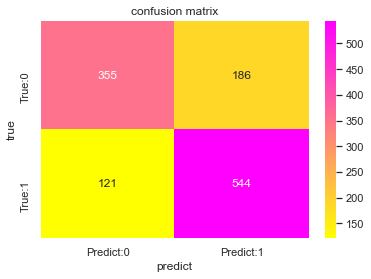

<Figure size 504x288 with 0 Axes>

In [51]:
sns.set()
f,ax=plt.subplots()
confusion = confusion_matrix(yval,y_predict_none)
confusion

conf_matrix = pd.DataFrame(data=confusion,columns=['Predict:0','Predict:1'],index=['True:0','True:1'])
plt.figure(figsize = (7,4))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = "spring_r", ax=ax)
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

- The result shows us that we have 366+537 = 903 correct predictions and 128 + 175 = 303 incorrect prediction. 

In [52]:
TP=confusion[1,1] #TP = True Positive
TN=confusion[1,0] #TN = True Negative
FP=confusion[0,1] #FN = False Negative
FN=confusion[0,0] #FP = False Positive

print('FN:',FN, 'FP:', FP)
print('TN:', TN, 'TP:',TP)
print('False positive rate:', round(FP/(FP+TN+0.01), 3))
print('False negative rate:', round(FN/(FN+TP+0.01), 3))

from sklearn.metrics import classification_report
print(classification_report(yval, y_predict_none, target_names=['0', '1']))


FN: 355 FP: 186
TN: 121 TP: 544
False positive rate: 0.606
False negative rate: 0.395
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       541
           1       0.75      0.82      0.78       665

    accuracy                           0.75      1206
   macro avg       0.75      0.74      0.74      1206
weighted avg       0.75      0.75      0.74      1206



#### Penalty with l1

Text(30.5, 0.5, 'true')

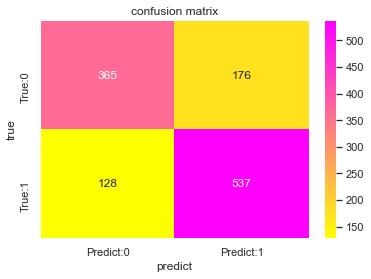

<Figure size 504x288 with 0 Axes>

In [53]:

sns.set()
f,ax=plt.subplots()
confusion = confusion_matrix(yval,y_predict_l1)
confusion

conf_matrix = pd.DataFrame(data=confusion,columns=['Predict:0','Predict:1'],index=['True:0','True:1'])
plt.figure(figsize = (7,4))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = "spring_r", ax=ax)
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴


- The result shows us that we have 352+563 = 915 correct predictions and 136 + 156 = 292 incorrect prediction. 

In [54]:
TP=confusion[1,1] #TP = True Positive
TN=confusion[1,0] #TN = True Negative
FP=confusion[0,1] #FN = False Negative
FN=confusion[0,0] #FP = False Positive

print('FN:',FN, 'FP:', FP)
print('TN:', TN, 'TP:',TP)
print('False positive rate:', round(FP/(FP+TN+0.01), 3))
print('False negative rate:', round(FN/(FN+TP+0.01), 3))

from sklearn.metrics import classification_report
print(classification_report(yval, y_predict_l1, target_names=['0', '1']))


FN: 365 FP: 176
TN: 128 TP: 537
False positive rate: 0.579
False negative rate: 0.405
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       541
           1       0.75      0.81      0.78       665

    accuracy                           0.75      1206
   macro avg       0.75      0.74      0.74      1206
weighted avg       0.75      0.75      0.75      1206



#### Penalty with l2

Text(30.5, 0.5, 'true')

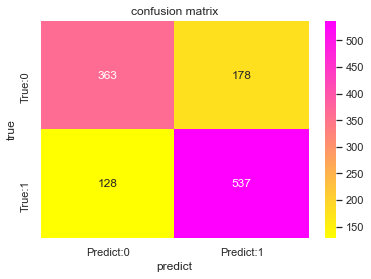

<Figure size 504x288 with 0 Axes>

In [55]:
sns.set()
f,ax=plt.subplots()
confusion = confusion_matrix(yval,y_predict_l2)
confusion

conf_matrix = pd.DataFrame(data=confusion,columns=['Predict:0','Predict:1'],index=['True:0','True:1'])
plt.figure(figsize = (7,4))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = "spring_r", ax=ax)
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

- The result shows us that we have 350+565 = 915 correct predictions and 134 + 158 = 292 incorrect prediction. 

In [56]:
TP=confusion[1,1] #TP = True Positive
TN=confusion[1,0] #TN = True Negative
FP=confusion[0,1] #FN = False Negative
FN=confusion[0,0] #FP = False Positive

print('FN:',FN, 'FP:', FP)
print('TN:', TN, 'TP:',TP)
print('False positive rate:', round(FP/(FP+TN+0.01), 3))
print('False negative rate:', round(FN/(FN+TP+0.01), 3))

from sklearn.metrics import classification_report
print(classification_report(yval, y_predict_l2, target_names=['0', '1']))

FN: 363 FP: 178
TN: 128 TP: 537
False positive rate: 0.582
False negative rate: 0.403
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       541
           1       0.75      0.81      0.78       665

    accuracy                           0.75      1206
   macro avg       0.75      0.74      0.74      1206
weighted avg       0.75      0.75      0.74      1206



##  Choose Logistic Regression with penalty = l1

In [57]:
#logitreg = LogisticRegression(penalty='l1', solver='liblinear', C=1, class_weight='balanced')
logitreg = LogisticRegression(penalty='l1', solver='liblinear', C=1, class_weight='balanced')
logitreg.fit(Xtest,ytest)
y_predict = logitreg.predict(Xtest)

/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [58]:
#Model accuracy+precision+F1+AUC (Penalty: None)
accuracy = sklearn.metrics.accuracy_score(ytest, y_predict)
precision = sklearn.metrics.precision_score(ytest, y_predict)
F1 = sklearn.metrics.f1_score(ytest, y_predict)
ROC_AUC = sklearn.metrics.roc_auc_score(ytest, y_predict)
print('Logistic Regression Accuracy is: ', accuracy)
print('Logistic Regression Precision is: ', precision)
print('Logistic Regression F1 score is: ', F1)
print('Logistic Regression AUC_ROC score is: ', ROC_AUC)

Logistic Regression Accuracy is:  0.7497928748964374
Logistic Regression Precision is:  0.7722908093278463
Logistic Regression F1 score is:  0.788515406162465
Logistic Regression AUC_ROC score is:  0.7393323420409359


Text(30.5, 0.5, 'true')

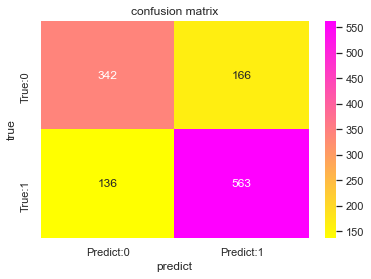

<Figure size 504x288 with 0 Axes>

In [59]:
sns.set()
f,ax=plt.subplots()
confusion = confusion_matrix(ytest,y_predict)
confusion

conf_matrix = pd.DataFrame(data=confusion,columns=['Predict:0','Predict:1'],index=['True:0','True:1'])
plt.figure(figsize = (7,4))
sns.heatmap(conf_matrix, annot = True,fmt = 'd',cmap = "spring_r", ax=ax)
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 


In [60]:
TP=confusion[1,1] #TP = True Positive
TN=confusion[1,0] #TN = True Negative
FP=confusion[0,1] #FN = False Negative
FN=confusion[0,0] #FP = False Positive

print('FN:',FN, 'FP:', FP)
print('TN:', TN, 'TP:',TP)
print('False positive rate:', round(FP/(FP+TN+0.01), 3))
print('False negative rate:', round(FN/(FN+TP+0.01), 3))

from sklearn.metrics import classification_report
print(classification_report(ytest, y_predict, target_names=['0', '1']))



FN: 342 FP: 166
TN: 136 TP: 563
False positive rate: 0.55
False negative rate: 0.378
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       508
           1       0.77      0.81      0.79       699

    accuracy                           0.75      1207
   macro avg       0.74      0.74      0.74      1207
weighted avg       0.75      0.75      0.75      1207



In [61]:
#identify and explain the most important relations between the variables and the expected outcome
# >>>>> Describe some analysis of the coefficients given by the model.
# ex. how the probability that the treatment is recommended changes with age? Or gender?
print(logitreg.coef_)
print(logitreg.predict_proba(Xtest)[:-1])
print(logitreg.intercept_)

[[-0.06558465  0.02475505 -0.89604917 -0.37422495 -0.15781451  2.220635
   0.          0.1287623   0.          0.          1.12119607  0.
   0.00607656]]
[[0.37373359 0.62626641]
 [0.46780212 0.53219788]
 [0.32316638 0.67683362]
 ...
 [0.62262985 0.37737015]
 [0.80868079 0.19131921]
 [0.26963646 0.73036354]]
[0.2167521]


In [62]:
#Reference: https://stackoverflow.com/questions/36681449/scikit-learn-return-value-of-logisticregression-predict-proba

print(logitreg.predict_proba(Xtest)[:,1])

[0.62626641 0.53219788 0.67683362 ... 0.19131921 0.73036354 0.68603795]


In [63]:
#identify and explain the most important relations between the variables and the expected outcome
# >>>>> Describe some analysis of the coefficients given by the model.
# ex. how the probability that the treatment is recommended changes with age? Or gender?
target = df_new[['treatment']]
features = df_new.drop(columns = ['treatment','TestA', 'GeneD'])

X_1 = sm.add_constant(features)
X_1

model = sm.OLS(target,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              treatment   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     244.9
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:48:27   Log-Likelihood:                -3400.3
No. Observations:                6031   AIC:                             6821.
Df Residuals:                    6021   BIC:                             6888.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3241      0.026     12.351      0.000       0.273       0.376
age               -0.0129      0.001    -12.796      0.000      -0.015      -0.011
blood_pressure     0.0042      0.000     10.166      0.000       0.003       0.005
TestB             -0.2583      0.032     -8.082      0.000      -0.321      -0.196
GeneE             -0.0453      0.011     -4.114      0.000      -0.067      -0.024
GeneF             -0.0219      0.011     -1.984      0.047      -0.044      -0.000
female             0.4035      0.014     28.380      0.000       0.376       0.431
male              -0.0793      0.014     -5.532      0.000      -0.107      -0.051
bt_negative        0.1887      0.016     12.158      0.000       0.158       0.219
bt_positive        0.1354      0.017      7.842      0.000       0.102       0.169
fh_False           0.0443      0.023      1.893      0.058      -0.002       0.090
fh_True            0.2798      0.030      9.305      0.000       0.221       0.339
C_not active       0.1590      0.014     11.158      0.000       0.131       0.187
C_active           0.1651      0.014     11.621      0.000       0.137       0.193
==============================================================================
Omnibus:                      390.641   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.998
Skew:                          -0.274   Prob(JB):                     6.14e-44
Kurtosis:                       2.299   Cond. No.                     2.76e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
#logitreg.fit_regularized().params
#log_reg.fit().params

In [65]:
#print(logitreg.intercept_, logitreg.coef_)
#print(logitreg.coef_)
#sm.Logit(y, X)

In [66]:
#import statsmodels.api as sm
#logitreg = sm.Logit(y, X)
#result = logitreg.fit()
#print(result.summary())


In [67]:
#model.predict_proba(Xtest)